<a href="https://colab.research.google.com/github/adenium18/Feynnlabs/blob/main/ev_segmentation%20by%20Deepali(individual-task).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
file=files.upload()

Saving smev_data.xlsx to smev_data.xlsx


# all categories of evs

In [ ]:
data_smev_EV=pd.read_excel('smev_data.xlsx',sheet_name='EV Industries')
data_smev_EV.head()

,category,financial_year,num_vehicles
0,E-2 Wheelers,2017-18,1981
1,E-2 Wheelers,2018-19,27478
2,E-2 Wheelers,2019-20,26512
3,E-2 Wheelers,2020-21,44294
4,E-2 Wheelers,2021-22,249615


In [ ]:
#categorywise info of vehicles
print(data_smev_EV.shape)
print(data_smev_EV.groupby('category').num_vehicles.sum())

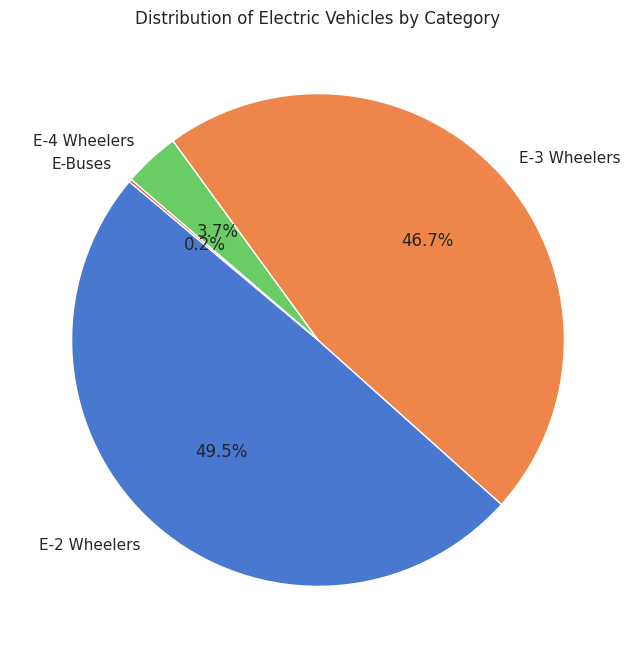

In [ ]:
# Data preparation
data = {
    'Category': ['E-2 Wheelers', 'E-3 Wheelers', 'E-4 Wheelers', 'E-Buses'],
    'num_vehicles': [1077970, 1016375, 80141, 3967]
}

df = pd.DataFrame(data)

# Plotting the pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(df['num_vehicles'], labels=df['Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("muted"))
plt.title('Distribution of Electric Vehicles by Category')
plt.show()

### Total Number of Vehicles Sold by Category Over the Years

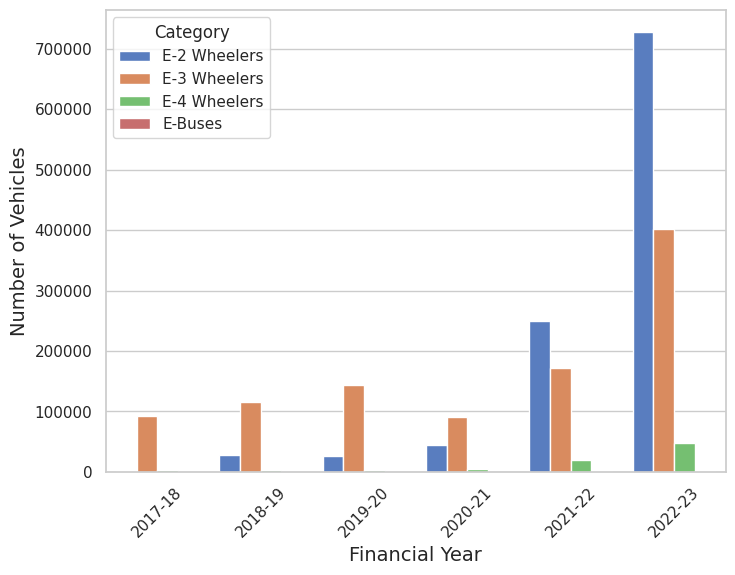

In [ ]:
# Set the aesthetics for the plots
sns.set(style='whitegrid')

# Create a bar plot for total number of vehicles sold by category over the years
plt.figure(figsize=(8,6))
sns.barplot(data=data_smev_EV, x='financial_year', y='num_vehicles', hue='category', palette='muted')

# Add title and labels
#plt.title("Total Number of Vehicles Sold by Category Over the Years", fontsize=16)
plt.xlabel('Financial Year', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Category')

# Show the plot
plt.show()


### year over year growth in vehicle sales for each category

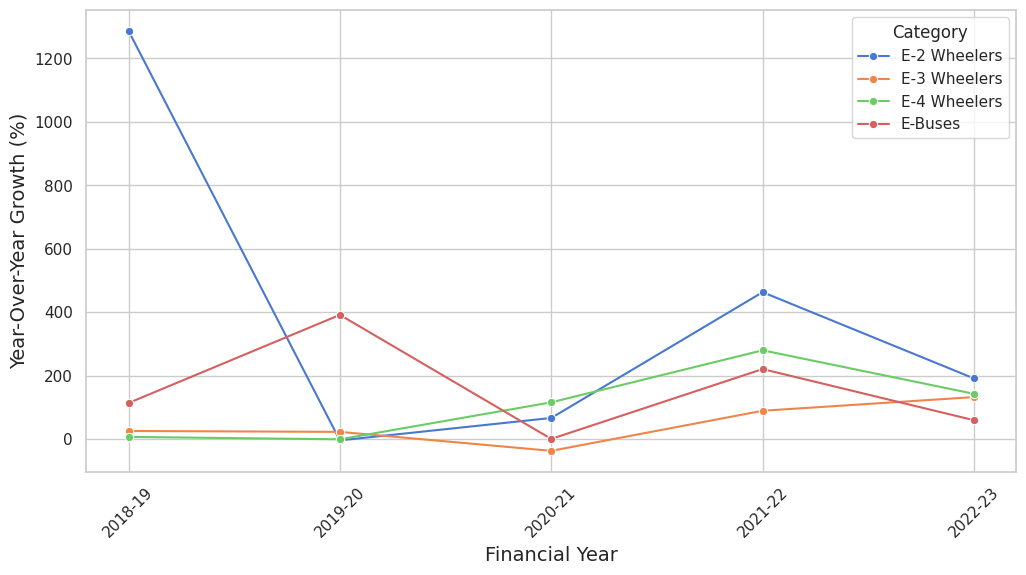

In [ ]:
# Calculate year-over-year growth
data_smev_EV['prev_year_num_vehicles'] = data_smev_EV.groupby('category')['num_vehicles'].shift(1)
data_smev_EV['yoy_growth'] = ((data_smev_EV['num_vehicles'] - data_smev_EV['prev_year_num_vehicles']) /data_smev_EV['prev_year_num_vehicles']) * 100

# Create a line plot for year-over-year growth in vehicle sales for each category
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_smev_EV, x='financial_year', y='yoy_growth', hue='category', marker='o', palette='muted')

# Add title and labels

plt.xlabel('Financial Year', fontsize=14)
plt.ylabel('Year-Over-Year Growth (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Category')

# Show the plot
plt.show()


# two wheeler EV dataset

In [ ]:
# data_SMEV ev 2wheeler data
data_smev1920=pd.read_excel('smev_data.xlsx',sheet_name='EV 2W FY 19-20')
data_smev2021=pd.read_excel('smev_data.xlsx',sheet_name='EV 2W FY 20-21')
data_smev2122=pd.read_excel('smev_data.xlsx',sheet_name='EV 2W FY 21-22')
data_smev2223=pd.read_excel('smev_data.xlsx',sheet_name='EV 2W FY 22-23')

In [ ]:
# ev 2 wheeler data combined
data_e2w=pd.concat([data_smev1920,data_smev2021,data_smev2122,data_smev2223])
data_e2w.head()

,financial_year,maker,market_share,month,num_vehicles
0,2019-20,Hero Electric,0.3,Apr,1776
1,2019-20,Hero Electric,0.3,May,455
2,2019-20,Hero Electric,0.3,Jun,329
3,2019-20,Hero Electric,0.3,Jul,260
4,2019-20,Hero Electric,0.3,Aug,249


In [ ]:
data_e2w['maker'].unique()

array(['Hero Electric', 'Okinawa Autotech', 'Ather Energy',
       'Ampere Vehicles', 'Revolt', 'Others', 'Bajaj', 'Pure EV',
       'Benling', 'Jitendra', 'TVS', 'Ola Electric', 'OLA ELECTRIC',
       'OKINAWA', 'HERO ELECTRIC', 'AMPERE', 'ATHER', 'BAJAJ', 'OKAYA EV',
       'REVOLT', 'PURE EV', 'BEING INDIA', 'JITENDRA NEW EV', 'OTHERS'],
      dtype=object)

removing the duplicate names of bike models

In [ ]:
data_e2w['maker']=data_e2w['maker'].replace('HERO ELECTRIC','Hero Electric').replace('OLA ELECTRIC','Ola Electric').replace('OKINAWA','Okinava Autotech').replace('AMPERE','Ampere Vehicles')
data_e2w['maker']=data_e2w['maker'].replace('ATHER','Ather').replace("BAJAJ",'Bajaj').replace("REVOLT",'Revolt').replace('PURE EV','Pure EV').replace('OTHERS','Others').replace('BEING INDIA','Benling')
data_e2w['maker']=data_e2w['maker'].replace('JITENDRA NEW EV','Jitendra').replace('OKAYA EV','Okinava Autotech').replace('Okinawa Autotech','Okinava Autotech')

<ipython-input-10-945f49d3f892>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_e2w, x='financial_year', y='num_vehicles', palette='muted')


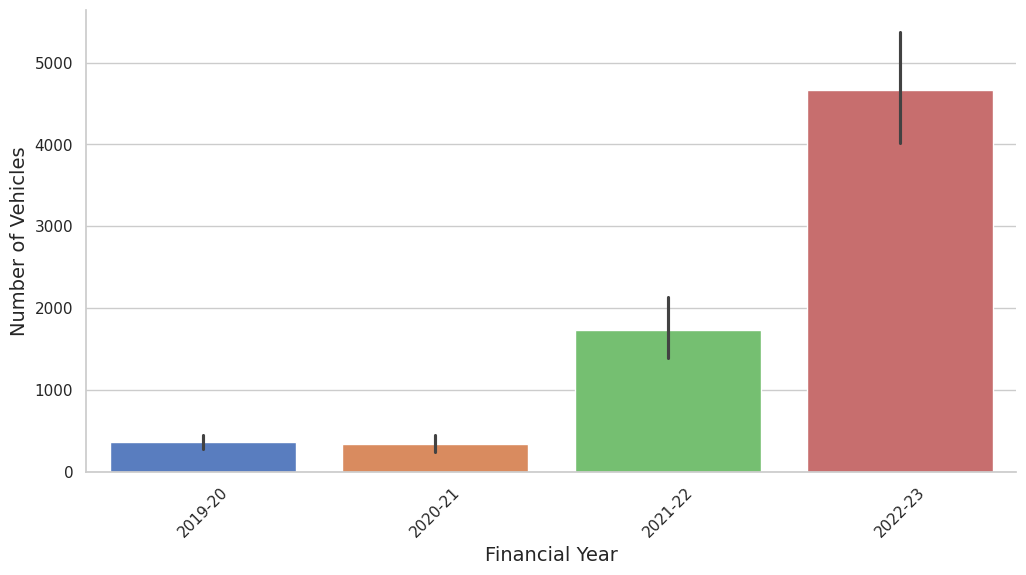

In [ ]:
sns.set(style='whitegrid')

# Visualization 1: Total number of vehicles sold by financial year
plt.figure(figsize=(12, 6))
sns.barplot(data=data_e2w, x='financial_year', y='num_vehicles', palette='muted')
#plt.title('Total Number of 2-Wheelers Sold by Financial Year', fontsize=16)
plt.xlabel('Financial Year', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.xticks(rotation=45)
sns.despine(top=True, right=True)
plt.show()



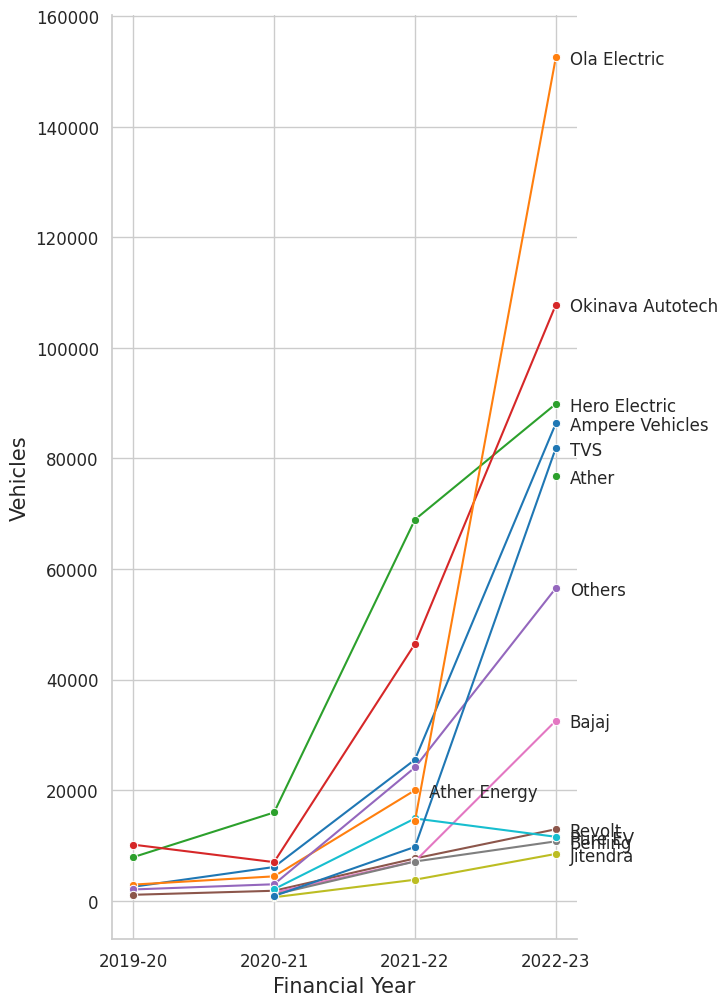

In [ ]:
#to check which maker has highest sales in a financial year
data_ev2w_year = data_e2w.groupby(['financial_year', 'maker']).agg({'num_vehicles':'sum'}).reset_index()

fig, ax = plt.subplots(figsize=(6,12))
ax = sns.lineplot(data=data_ev2w_year, x='financial_year', y='num_vehicles', hue='maker', marker='o', palette='tab10')
plt.xlabel("Financial Year", fontsize = 15)
plt.ylabel("Vehicles", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)


# Annotate the last data point
for col in data_ev2w_year['maker'].unique()[::1]:
    last_point = data_ev2w_year[data_ev2w_year['maker'] == col].iloc[-1]
    plt.annotate(f"{last_point['maker']}",
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5),
                 ha='left')
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().set_visible(False)
plt.savefig('ev_2w.png', format = 'png')
plt.show()

financial_year
2019-20     26512
2020-21     44294
2021-22    249615
2022-23    728090
Name: num_vehicles, dtype: int64


<ipython-input-12-79e85204f76d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='month', y='num_vehicles', palette='Dark2')


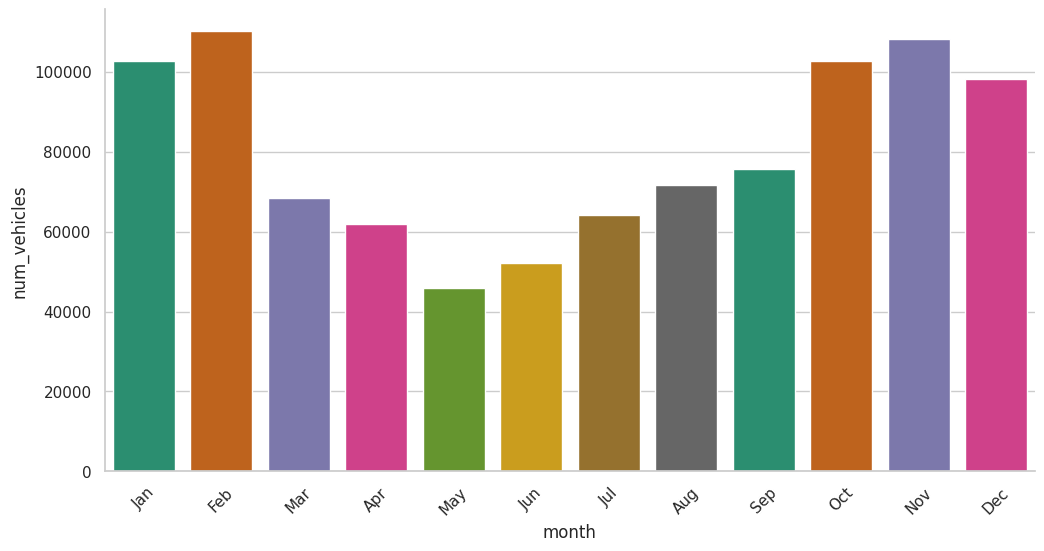

In [ ]:
#to check which maker has highest sales in a financial year
print(data_e2w.groupby('financial_year').num_vehicles.sum())


# Group data by month and calculate the total number of vehicles for each month
monthly_sales = data_e2w.groupby('month')['num_vehicles'].sum().reset_index()
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Assuming data_e2w is your DataFrame and 'month', 'num_vehicles', and 'financial_year' are columns in it.

# Convert the 'month' column to a categorical type with the specified order
data_e2w['month'] = pd.Categorical(data_e2w['month'], categories=months_order, ordered=True)

# Group data by month and financial year, then calculate the total number of vehicles for each group
monthly_sales = data_e2w.groupby(['month'])['num_vehicles'].sum().reset_index()

# Create a bar plot for the total number of vehicles per month, split by financial year
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(data=monthly_sales, x='month', y='num_vehicles', palette='Dark2')

# Remove the top and right spines for a cleaner look
sns.despine(top=True, right=True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

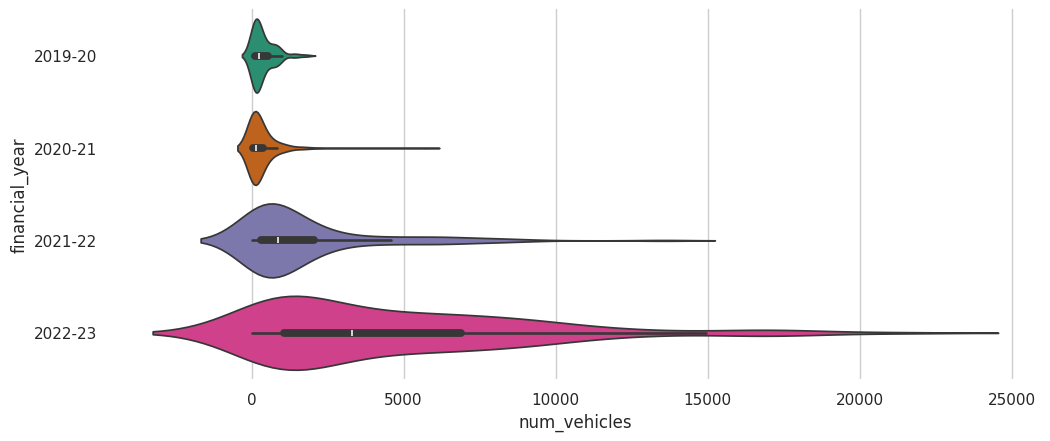

In [ ]:
# @title financial_year vs num_vehicles
figsize = (12, 1.2 * len(data_e2w['financial_year'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_e2w, x='num_vehicles', y='financial_year', inner='box', palette='Dark2',hue='financial_year',legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)

# e-bus *data*

In [ ]:
files.upload()

KeyboardInterrupt: 

In [ ]:
df=pd.read_csv('ev-charging-stations-india[1].csv')

# Group the data by state and city, and count the number of charging stations
charging_stations_count = df.groupby(['state', 'city']).size().reset_index(name='count')

# Sort the results by count in descending order
charging_stations_count = charging_stations_count.sort_values(by='count', ascending=False)

# Display the results
print(charging_stations_count.head())

In [ ]:
# Define the corrections for state name variations
state_corrections = {
    'Andra Pradesh': 'Andhra Pradesh',
    'Andhra pradesh': 'Andhra Pradesh',
    'AndhraPradesh': 'Andhra Pradesh',
    'Andra Pradesh': 'Andhra Pradesh',
    'Andhra Pradesh ': 'Andhra Pradesh',
    'Chattisgarh': 'Chhattisgarh',
    'chattisgarh': 'Chhattisgarh',
    'Delhi NCR': 'Delhi',
    'Hyderabadu00a0': 'Hyderabad',
    'Karala': 'Kerala',
    'Maharashra': 'Maharashtra',
    'PUNJAB': 'Punjab',
    'TAMIL NADU': 'Tamil Nadu',
    'TELENGANA': 'Telangana',
    'TamiNadu': 'Tamil Nadu',
    'TamilNadu': 'Tamil Nadu',
    'Uttarakhand ': 'Uttarakhand',
    'Uttarkhand': 'Uttarakhand',
    'Uttrakhand': 'Uttarakhand',
    'WestBengal': 'West Bengal'
}

# Apply corrections to the state names
df['state'] = df['state'].replace(state_corrections)

# Group by the corrected state names and count the number of charging stations
charging_stations_by_state_corrected =df.groupby('state').size().reset_index(name='count')

# Sort the results by state name for better readability
charging_stations_by_state_corrected = charging_stations_by_state_corrected.sort_values(by='count',ascending=False).reset_index(drop=True)

# Display the results
print(charging_stations_by_state_corrected.head() )

In [ ]:

# Plotting the data
plt.figure(figsize=(12, 8))
plt.bar(charging_stations_by_state_corrected['state'], charging_stations_by_state_corrected['count'], color='skyblue')

# Adding titles and labels
plt.title('Number of EV Charging Stations per State in India')
plt.xlabel('State')
plt.ylabel('Number of Charging Stations')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

# segmentation on ev_model_spec data

In [ ]:
file=files.upload()

Saving ev_model_spec.csv to ev_model_spec.csv


In [ ]:
data=pd.read_csv('ev_model_spec.csv')

In [ ]:
data.head()

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,Ampere Magnus EX,104758,121,53,90,7,1200
1,Ampere Magnus Pro,66053,45,25,94,10,250
2,Ampere REO,61993,45,25,88,10,250
3,Ampere Zeal,96544,120,53,80,7,1200
4,Ather 450X,135489,111,90,108,8,3000


In [ ]:
data.describe()

,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,94763.897436,100.666667,49.717949,98.846154,5.410256,1364.102564
std,30861.662954,34.834446,23.557264,29.030418,1.665722,1302.777838
min,51094.000000,45.000000,25.000000,59.000000,3.000000,250.000000
25%,69553.500000,79.500000,25.000000,78.000000,4.000000,250.000000
50%,90282.000000,90.000000,48.000000,93.000000,5.000000,1000.000000
75%,109809.000000,120.500000,64.000000,112.500000,6.000000,1950.000000
max,171250.000000,180.000000,116.000000,150.000000,10.000000,5500.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Model Name                   39 non-null     object
 1   Price                        39 non-null     int64 
 2   Riding Range (km)            39 non-null     int64 
 3   Top Speed (kmph)             39 non-null     int64 
 4   Weight (kg)                  39 non-null     int64 
 5   Battery Charging Time (hrs)  39 non-null     int64 
 6   Rated Power (W)              39 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.3+ KB


# Top speeds achieved by the ev 2 wheeler of a brand

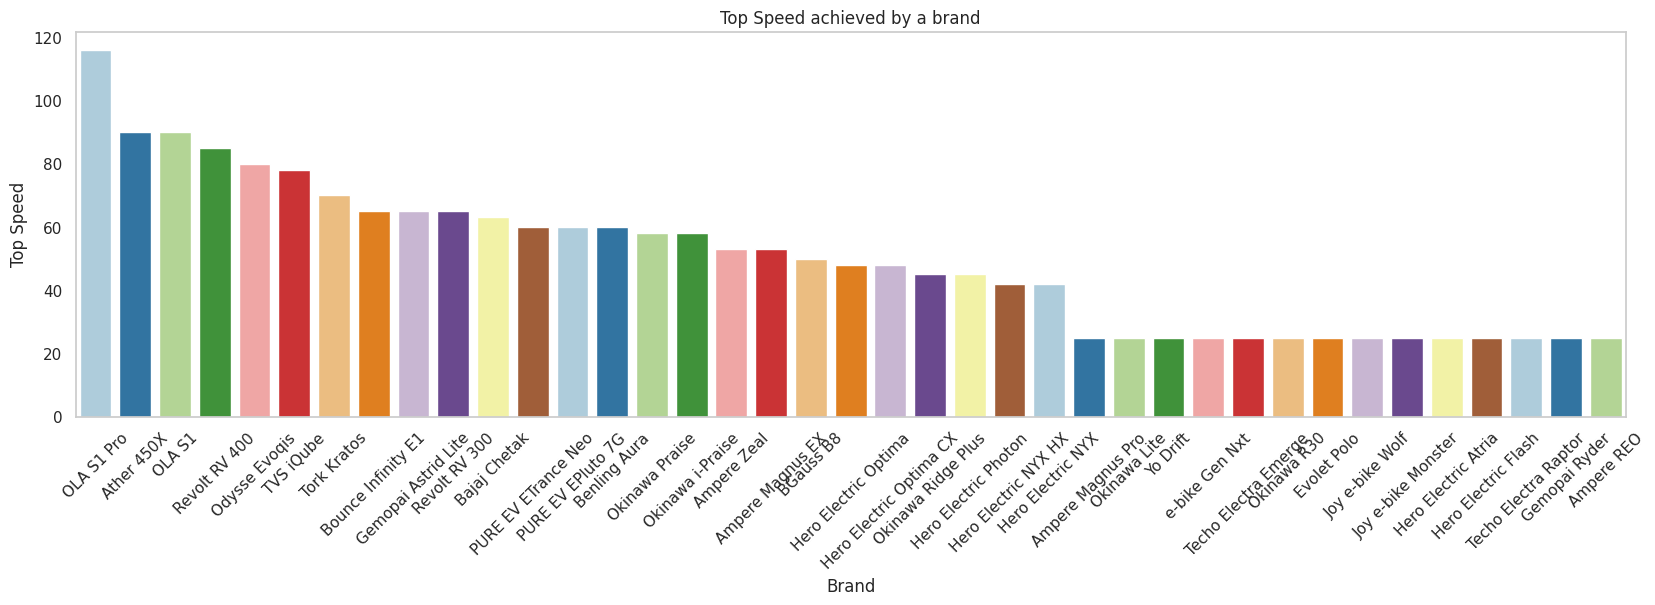

In [ ]:
plt.figure(figsize=(20,5))
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)
data=data.sort_values(by='Top Speed (kmph)',ascending=False)
sns.barplot(data=data,x='Model Name',y='Top Speed (kmph)',hue='Model Name',palette='Paired')
plt.show()

# max Riding Range achieved by each brand

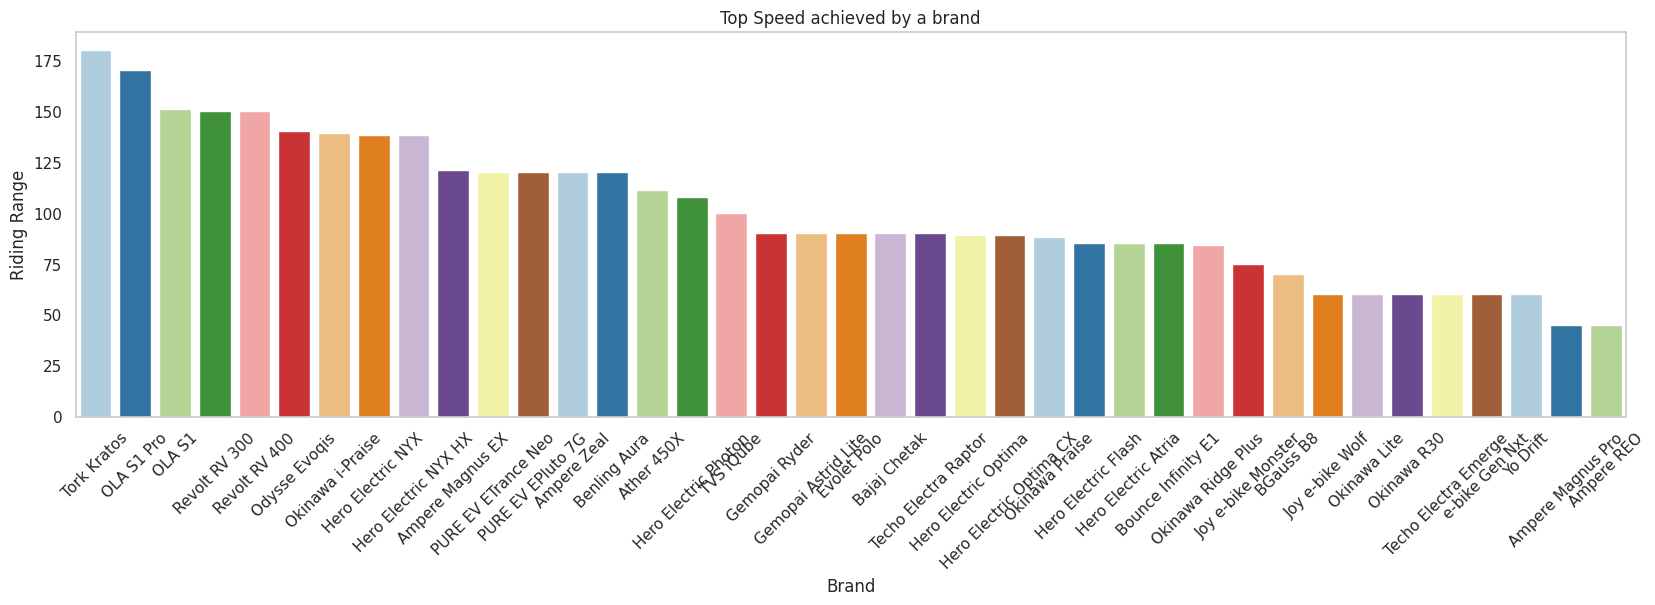

In [ ]:
# max riding range Distribution (assuming columns 'vehicle_type' and 'battery_capacity')
plt.figure(figsize=(20,5))
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Riding Range')
plt.xticks(rotation=45)
data=data.sort_values(by='Riding Range (km)',ascending=False)
sns.barplot(data=data,x='Model Name',y='Riding Range (km)',hue='Model Name',palette='Paired')
plt.show()

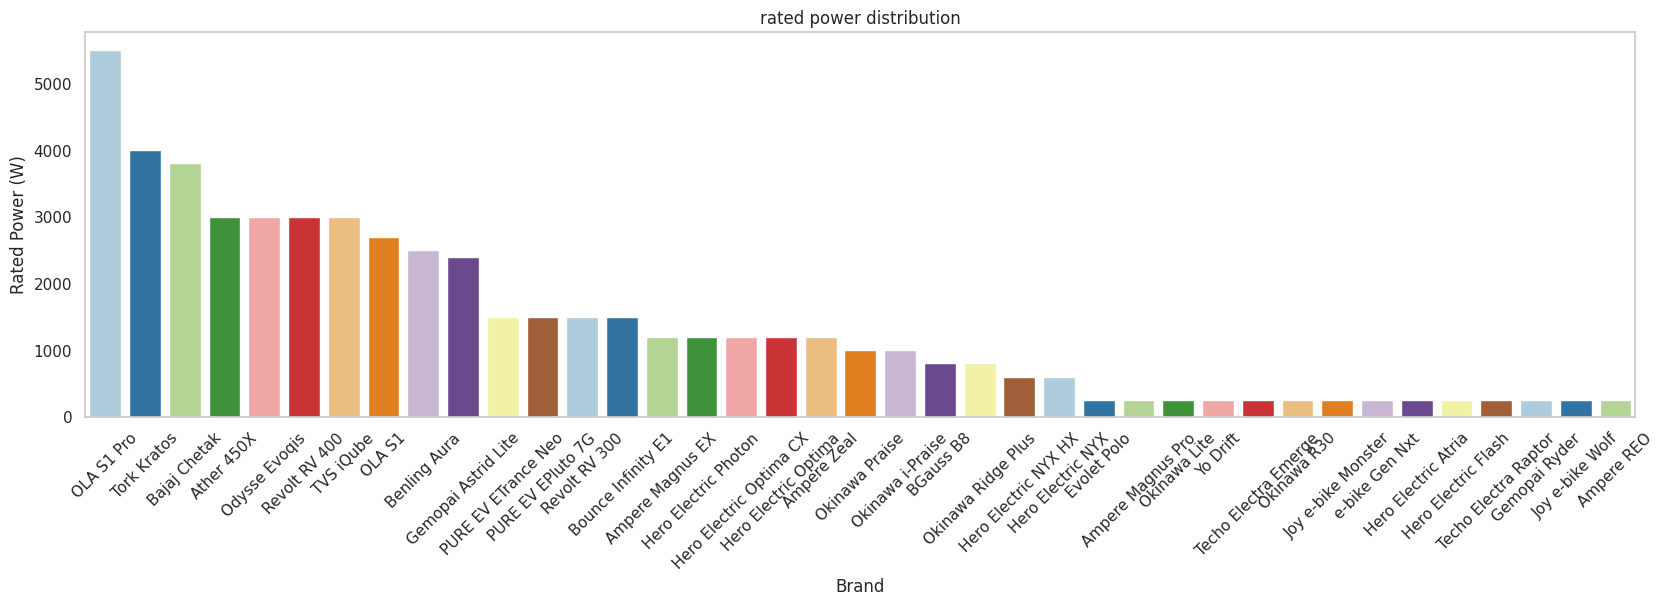

In [ ]:
#Rated power distribution (assuming columns 'vehicle_type' and 'battery_capacity')
plt.figure(figsize=(20,5))
plt.grid(axis='y')
plt.title('rated power distribution')
plt.xlabel('Brand')
plt.ylabel('Rated Power (W)')
plt.xticks(rotation=45)
data=data.sort_values(by='Rated Power (W)',ascending=False)
sns.barplot(data=data,x='Model Name',y='Rated Power (W)',hue='Model Name',palette='Paired')
plt.show()

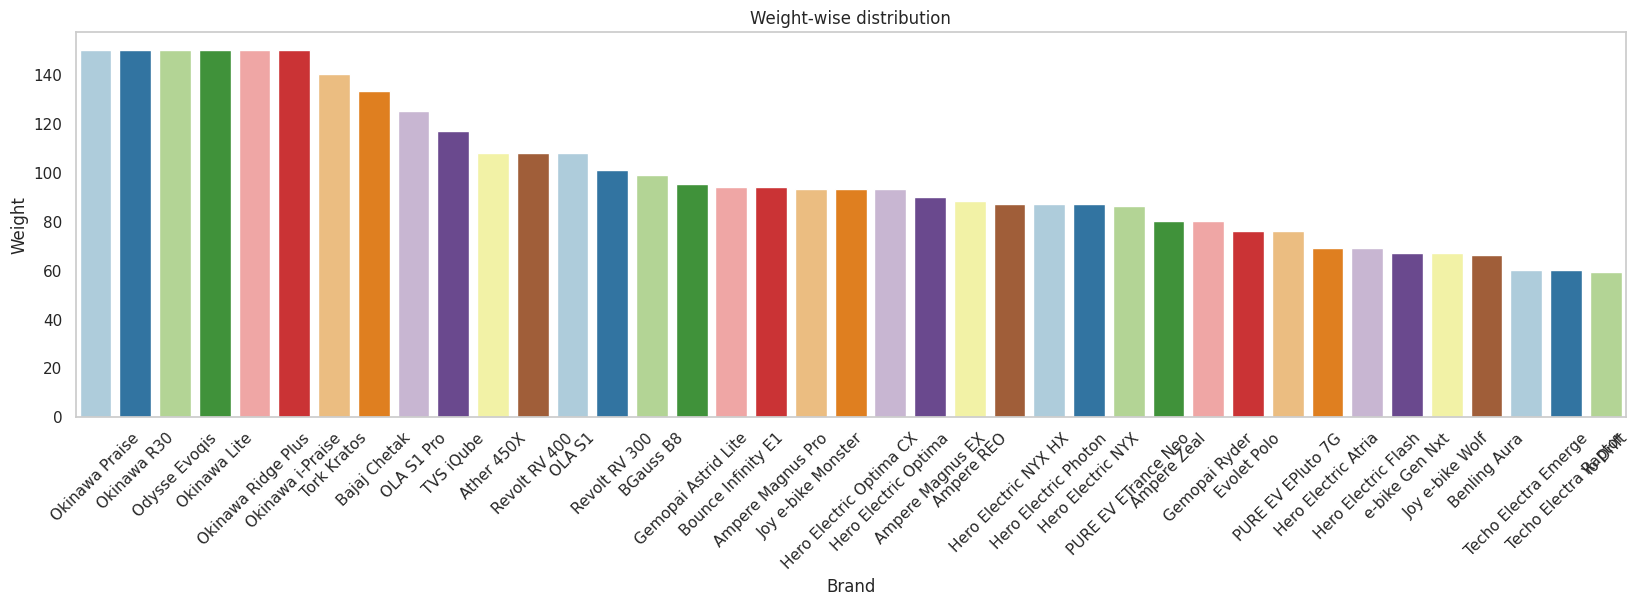

In [ ]:
#Weight distribution (assuming columns 'vehicle_type' and 'battery_capacity')
plt.figure(figsize=(20,5))
plt.grid(axis='y')
plt.title('Weight-wise distribution')
plt.xlabel('Brand')
plt.ylabel('Weight')
plt.xticks(rotation=45)
data=data.sort_values(by='Weight (kg)',ascending=False)
sns.barplot(data=data,x='Model Name',y='Weight (kg)',hue='Model Name',palette='Paired')
plt.show()

Battery Charging Time (hrs)
3      2
4      9
5     17
6      2
7      4
8      3
10     2
Name: Model Name, dtype: int64


<ipython-input-44-f5c359c325ac>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x='Battery Charging Time (hrs)',palette='Paired')


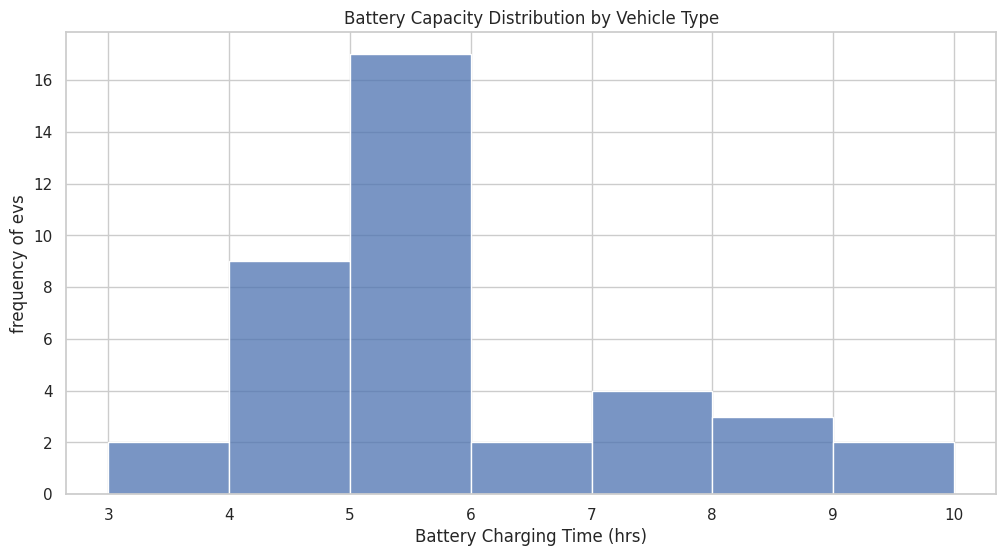

In [ ]:
print(data.groupby('Battery Charging Time (hrs)')['Model Name'].count())

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Battery Charging Time (hrs)',palette='Paired')
plt.title('Battery Capacity Distribution by Vehicle Type')
plt.xlabel('Battery Charging Time (hrs)')
plt.ylabel('frequency of evs')
plt.show()

# feature engineering

In [ ]:
#remove text column model name for PCA
num_data=data.drop('Model Name',axis=1)

#apply standardscaler on each column of num_data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
ss_data=scaler.fit_transform(num_data)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 42)

In [ ]:
pca_data=pca.fit_transform(ss_data)

In [ ]:
df_pca=pd.DataFrame(pca_data,columns=[f'PC{x+1}' for x in range(len(num_data.columns))])

In [ ]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.320786,-1.777061,1.455773,-0.194228,0.424111,-0.319538
1,-1.466584,-0.686568,2.191868,0.182448,0.444855,0.245572
2,3.523908,0.125850,0.975989,0.324619,-0.841191,-0.206302
3,-1.379105,-0.682233,2.196937,0.187217,0.292336,0.209745
4,-0.357199,-1.824292,1.569599,-0.036795,0.621623,0.039424
5,1.531633,-0.741140,1.089321,1.206385,-0.153014,-0.339065
6,4.045380,0.740744,0.281267,1.007700,-0.629950,0.795292
7,2.011434,-0.156708,0.942459,-1.120337,-0.432758,0.722837
8,4.867189,1.107450,-0.431842,-0.565690,0.957383,0.389436
9,2.092942,-0.115506,0.308536,-0.920039,-0.448705,-0.170006


In [ ]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

In [ ]:
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.921717,0.599717,0.599717
PC2,1.035224,0.174035,0.773753
PC3,0.895835,0.130324,0.904076
PC4,0.557212,0.050421,0.954497
PC5,0.449788,0.032854,0.987351
PC6,0.279095,0.012649,1.000000


In [ ]:
factor_loadings = pd.DataFrame(pca.components_, columns = num_data.columns, index = df_pca.columns).T
factor_loadings.style.background_gradient(cmap = 'Blues')

,PC1,PC2,PC3,PC4,PC5,PC6
Price,0.487004,0.024138,0.028219,0.026545,-0.849095,-0.199453
Riding Range (km),0.433803,-0.107445,-0.407623,0.748633,0.217467,0.162392
Top Speed (kmph),0.495474,0.045626,-0.123914,-0.327427,0.428103,-0.668273
Weight (kg),0.297995,-0.215309,0.884291,0.210853,0.186978,0.058742
Battery Charging Time (hrs),0.011883,0.960127,0.169434,0.213828,0.052977,-0.027884
Rated Power (W),0.490108,0.132622,-0.083749,-0.491381,0.103472,0.695004


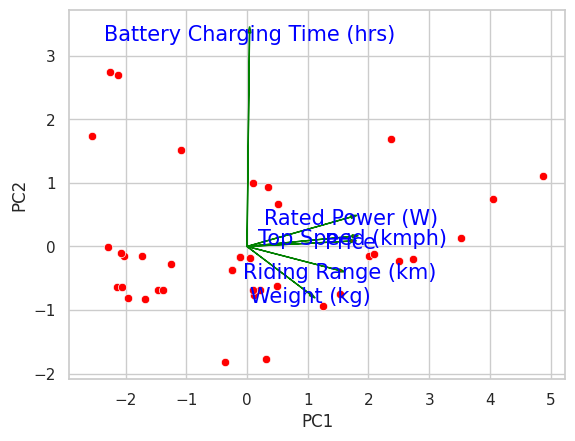

In [ ]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(df_pca, x = 'PC1', y = 'PC2', color = 'red')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='green')
    plt.text((factor_loadings['PC1'][i] * 3.5), factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=15, ha='center', color = 'blue', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('A Principal components analysis of the EV 2-Wheeler data set')
plt.grid(True)
plt.savefig("pca_2w.png", format = 'png')
plt.show()

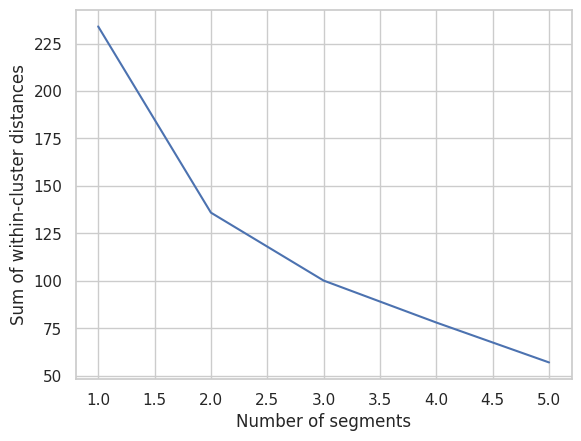

In [ ]:
from sklearn.cluster import KMeans
# Set the random seed for reproducibility
np.random.seed(1234)


nrep = 10
num_segments = range(1,6)
within_cluster_distances = []
EV_km28 = {}

# Run K-means clustering for each number of clusters
for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(ss_data)
    within_cluster_distances.append(kmeans.inertia_)
    EV_km28[str(k)] = kmeans

# Plot the results
plt.plot(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
#plt.title("Segmentation Results")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


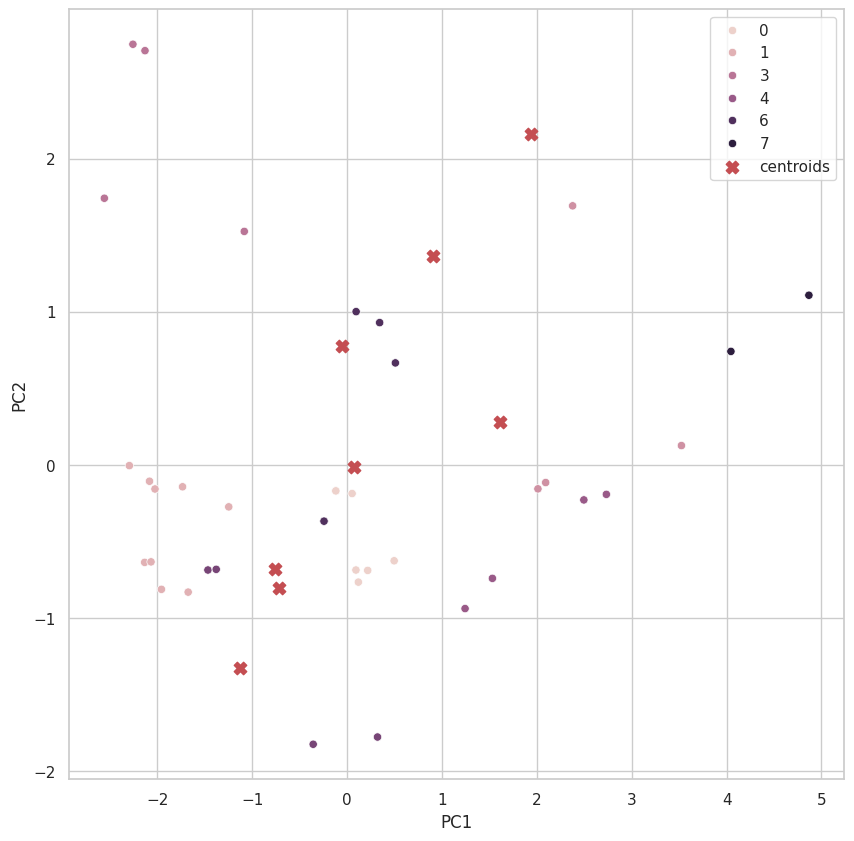

In [ ]:
plt.figure(figsize=(10, 10))
kmeans = KMeans(8, random_state=0).fit(ss_data)

pca = PCA(n_components=8)


pf = pd.DataFrame(data=pca_data, columns=[f"PC{i+1}" for i in range(len(factor_loadings['PC1']))])
sns.scatterplot(data=pf, x='PC1', y='PC2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', c="r", s=80, label='centroids')
plt.legend()
plt.show()

# we can observe elbow at k=2

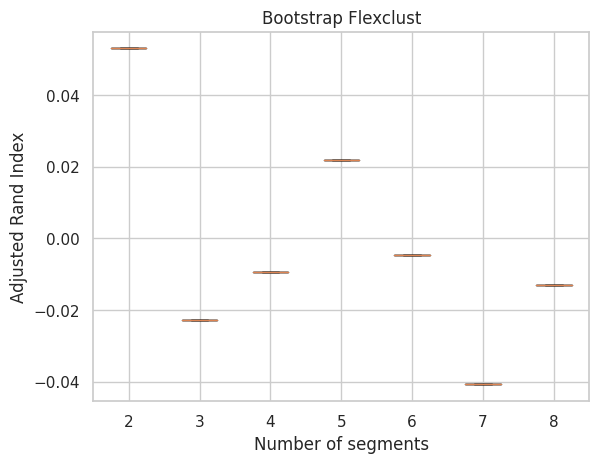

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
np.random.seed(1234)
nboot = 100
nrep = 10

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(ss_data, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(ss_data)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

In [ ]:
'''kmeans=EV_km28['6']
kmeans.labels_'''

"kmeans=EV_km28['6']\nkmeans.labels_"

In [ ]:
'''
rng = np.random.default_rng()

kmeans = KMeans(n_clusters=3)
X = rng.choice(ss_data, 200, axis=0)
kmeans.fit(X)'''

'\nrng = np.random.default_rng()\n\nkmeans = KMeans(n_clusters=3)\nX = rng.choice(ss_data, 200, axis=0)\nkmeans.fit(X)'

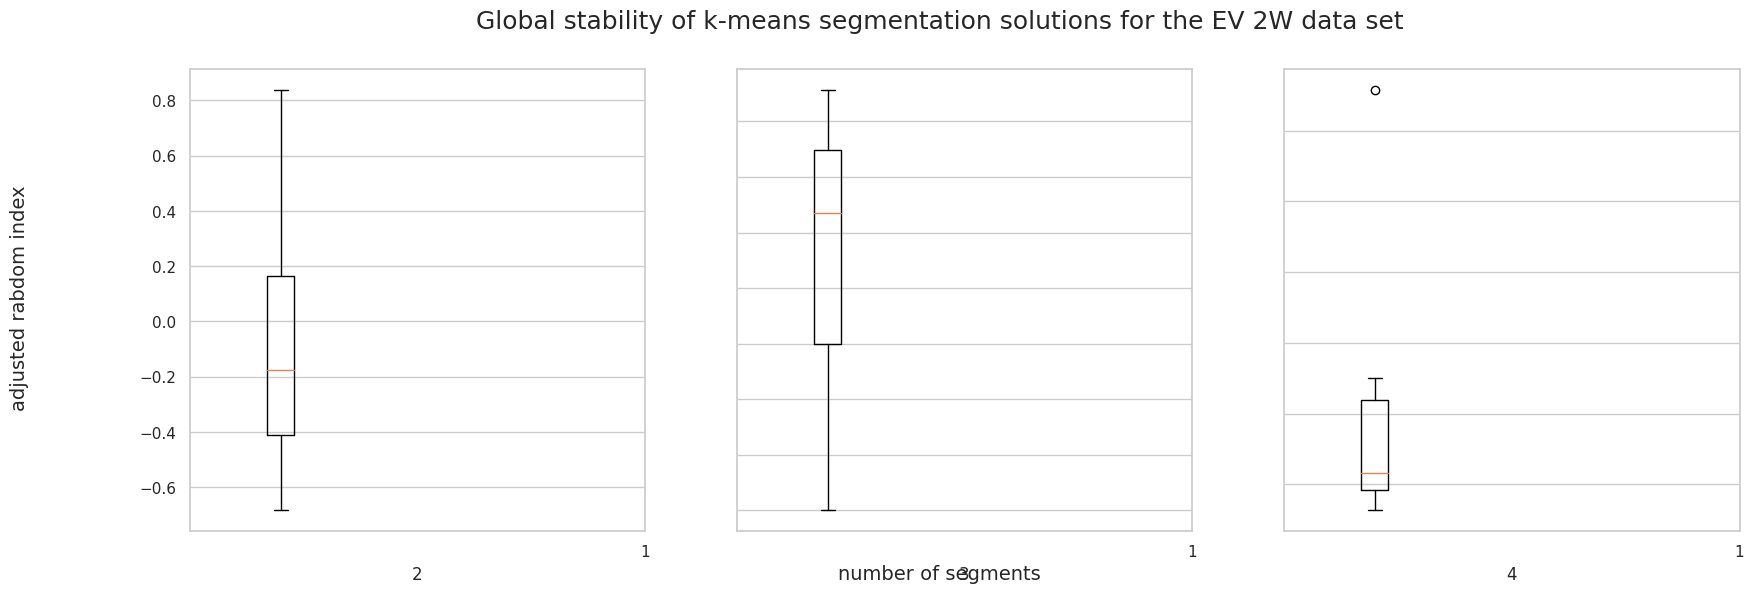

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,6))

fig.suptitle('Global stability of k-means segmentation solutions for the EV 2W data set', fontsize=18)

i=0


for ax in axes.flatten():
    ax.boxplot(kmeans.cluster_centers_[i])
    i+=1
    ax.label_outer()
    ax.set_xticks([i])
    ax.set_xlabel(i+1)

fig.text(0.5, 0.04, 'number of segments', va='center', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'adjusted rabdom index', va='center', ha='center', rotation='vertical', fontsize=14)

plt.show()

In [ ]:
pd.DataFrame(kmeans.cluster_centers_, columns = num_data.columns)

,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,-0.259483,0.836468,0.251727,-0.463247,-0.683933,-0.094283
1,1.035835,1.451355,1.640164,0.319441,-0.249513,1.138807
2,-0.971063,-1.182688,-1.062987,1.785112,-0.249513,-0.866354
3,-1.158940,-1.299018,-0.847964,-0.622776,2.061602,-0.780815
4,-0.894348,-0.513791,-1.062987,-0.964766,-0.614426,-0.866354
5,1.707449,0.271437,1.029907,1.203497,-0.046784,1.479481
6,0.609849,0.620426,0.356167,1.785112,-0.654972,-0.283135
7,0.270114,-0.281131,0.270158,-0.215645,-0.553607,0.105677


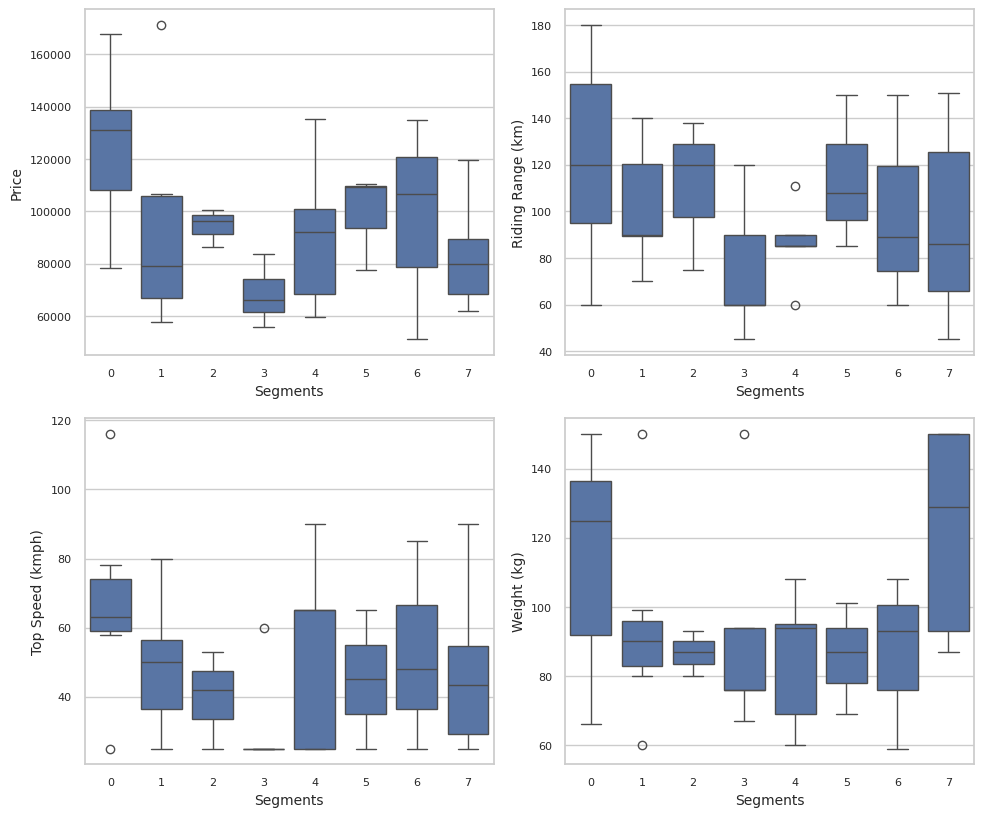

In [ ]:
plt.figure(figsize = (10, 12))
for i, col in enumerate(num_data.columns[-8:-2]):
    plt.subplot(3, 2, i+1)
    sns.boxplot(num_data, x = kmeans.labels_, y =col)
    plt.xlabel("Segments", fontsize= 10)
    plt.ylabel(col, fontsize = 10)
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
plt.tight_layout()
plt.show()

Here's a concise description for each segment of electric two-wheelers based on the box plots:

### Segment 0
- **Price**: Mid-range
- **Riding Range**: 60-120 km
- **Top Speed**: Up to 120 km/h
- **Weight**: Mostly above 100 kg

### Segment 1
- **Price**: High, variable
- **Riding Range**: 80-140 km
- **Top Speed**: 60-100 km/h
- **Weight**: Mostly above 120 kg

### Segment 2
- **Price**: Low to mid-range
- **Riding Range**: 60-100 km
- **Top Speed**: 40-80 km/h
- **Weight**: 80-120 kg

### Segment 3
- **Price**: Mid-range
- **Riding Range**: 60-120 km
- **Top Speed**: 40-80 km/h
- **Weight**: 60-120 kg

### Segment 4
- **Price**: Higher, variable
- **Riding Range**: 80-140 km
- **Top Speed**: 40-80 km/h
- **Weight**: 60-100 kg

### Segment 5
- **Price**: High, variable
- **Riding Range**: 80-160 km
- **Top Speed**: 40-80 km/h
- **Weight**: 80-140 kg

### Segment 6
- **Price**: Low to mid-range
- **Riding Range**: 60-100 km
- **Top Speed**: 40-80 km/h
- **Weight**: 60-100 kg

### Segment 7
- **Price**: Mid-range
- **Riding Range**: 60-100 km
- **Top Speed**: 40-80 km/h
- **Weight**: 80-140 kg

### Summary:
- **High-Price Segments**: Segments 1 and 5, with high weights and top speeds (Segment 1), and high riding range (Segment 5).
- **Moderate-Price Segments**: Segments 0, 3, 4, and 7, with varying characteristics.
- **Lower-Price Segments**: Segments 2 and 6, with moderate to low top speeds and weights.